# 数据预处理 #


***首先打开各csv文件查看详细信息***  
1. 发现item_id是商品id，如id为40的商品为“最佳100首古典旋律音乐作品”  
2. item_category_id是商品类型id，如item_category_id为12的商品种类为“游戏机 - PS4”

In [4]:
import pandas as pd
items = pd.read_csv('items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [6]:
item_categories = pd.read_csv('item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


**训练集处理**

In [7]:
sales_train = pd.read_csv('sales_train.csv')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [40]:
shops = pd.read_csv('shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [31]:
test = pd.read_csv('test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [14]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [15]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

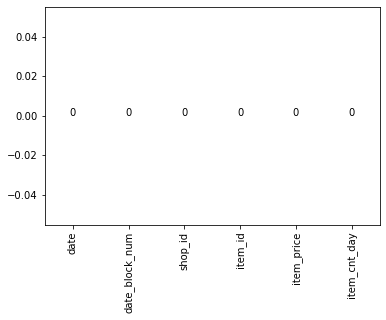

In [18]:
import matplotlib.pyplot as plt
train = sales_train
missing = train.isnull().sum()
missingg = missing[missing>0]
missing.sort_values(inplace=True)
for i, j in enumerate(missing):
    plt.text(i, j, str(j), ha='center')
missing.plot.bar()

***可以看到属性值没有缺失，可以进行下一步处理***

In [23]:
import seaborn as sns

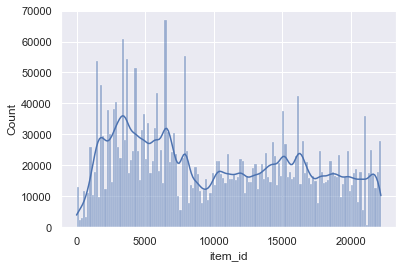

In [26]:
import seaborn as sns
sns.set()
sns.histplot(sales_train['item_id'], kde=True)  #使用kde=True来显示核密度估计,(kernel density estimates);

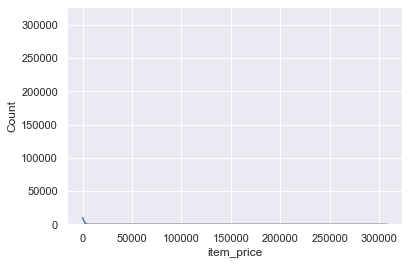

In [27]:
sns.set()
sns.histplot(sales_train['item_price'], kde=True)

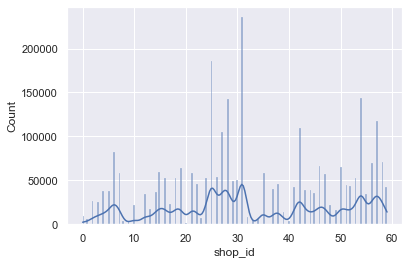

In [28]:
sns.set()
sns.histplot(sales_train['shop_id'], kde=True)

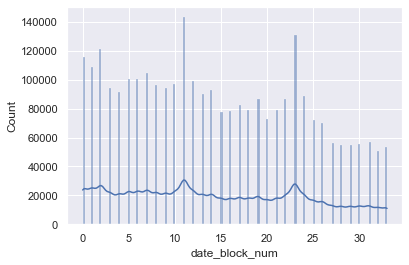

In [29]:
sns.set()
sns.histplot(sales_train['date_block_num'], kde=True)

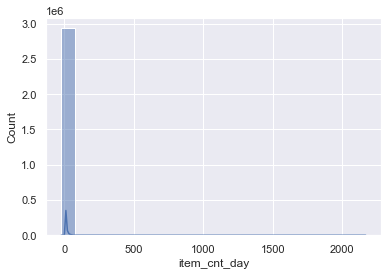

In [30]:
sns.set()
sns.histplot(sales_train['item_cnt_day'], kde=True)

In [32]:
# 样本总数
train_count = sales_train.shape[0]
test_count = test.shape[0]

In [33]:
# 不同取值水平汇总后排序，再除以样本总数
sales_train['item_id'].value_counts().sort_index()/train_count

0        3.406170e-07
1        2.043702e-06
2        6.812339e-07
3        6.812339e-07
4        3.406170e-07
             ...     
22165    6.812339e-07
22166    9.196658e-05
22167    3.794473e-04
22168    2.043702e-06
22169    3.406170e-07
Name: item_id, Length: 21807, dtype: float64

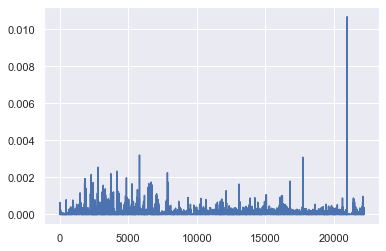

In [34]:
# 绘制分布图
(sales_train['item_id'].value_counts().sort_index()/train_count).plot()

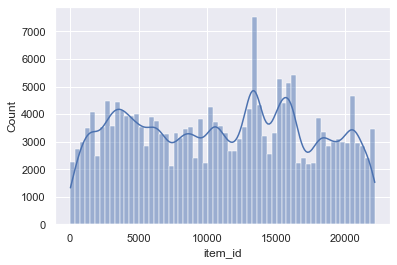

In [35]:
sns.set()
sns.histplot(test['item_id'], kde=True)

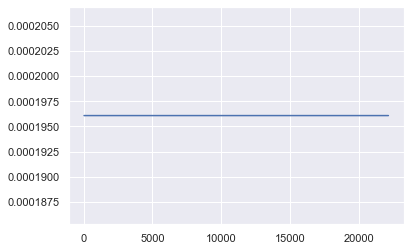

In [36]:
# 绘制分布图
(test['item_id'].value_counts().sort_index()/test_count).plot()

In [37]:
test['item_id'].value_counts().sort_index()/test_count

30       0.000196
31       0.000196
32       0.000196
33       0.000196
38       0.000196
           ...   
22162    0.000196
22163    0.000196
22164    0.000196
22166    0.000196
22167    0.000196
Name: item_id, Length: 5100, dtype: float64

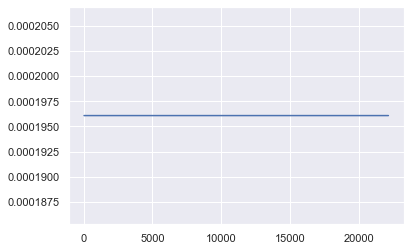

In [38]:
# 绘制分布图
(test['item_id'].value_counts().sort_index()/test_count).plot()

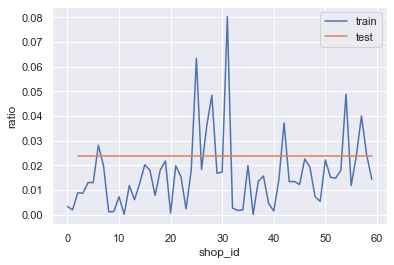

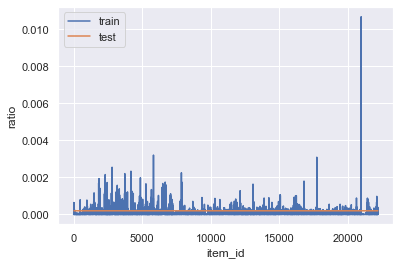

In [39]:
features = ['shop_id', 'item_id']

for feature in features:
    (sales_train[feature].value_counts().sort_index()/train_count).plot()
    (test[feature].value_counts().sort_index()/test_count).plot()
    
    plt.legend(['train', 'test'])
    plt.xlabel(feature)
    plt.ylabel('ratio')
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


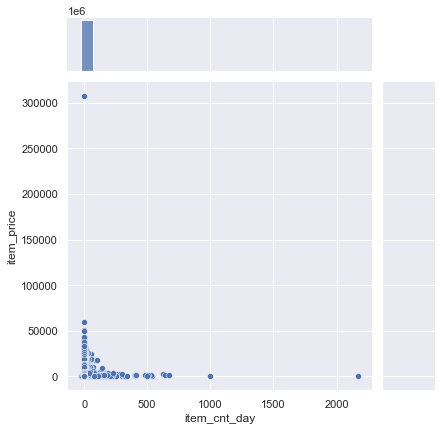

In [46]:
sns.jointplot('item_cnt_day', 'item_price', train, kind='scatter')

## 分析销量

In [48]:
pd.pivot_table(train,index=[u'date_block_num'])

,item_cnt_day,item_id,item_price,shop_id
date_block_num,,,,
0,1.136477,10234.002827,710.622127,29.536416
1,1.179325,9907.138004,695.866856,28.648339
2,1.212572,10061.325142,694.688063,33.098939
3,1.138998,10321.499166,653.633797,33.630981
4,1.165771,10357.272725,624.179993,33.718752
5,1.248777,10431.473542,630.893644,33.511947
6,1.163285,10612.447587,618.578247,33.577555
7,1.195844,10174.196904,624.576855,33.508829
8,1.386896,9963.610691,756.228823,33.372312


In [52]:
pd.pivot_table(train,index=[u'date_block_num',u'item_id'])

item_cnt_day   item_price    shop_id
date_block_num item_id                                      
0              19           1.000000    28.000000  25.000000
               27           1.000000  2325.000000  19.142857
               28           1.000000   549.000000  35.375000
               29           0.666667  2397.500000  31.833333
               32           1.328889   338.110349  31.271111
...                              ...          ...        ...
33             22162        1.000000   349.000000  34.800000
               22163        1.040000   162.698400  32.560000
               22164        1.000000   549.000000  28.533333
               22166        1.833333   150.000000  55.000000
               22167        1.156250   293.098437  23.281250

[233912 rows x 3 columns]

In [62]:
item_cnt_month = pd.pivot_table(train,index=[u'date_block_num'],columns=[u'item_id'],values=[u'item_cnt_day'],aggfunc=sum,fill_value=0)
item_cnt_month

item_cnt_day                                                  \
item_id               0     1     2     3     4     5     6     7     8       
date_block_num                                                                
0                         0     0     0     0     0     0     0     0     0   
1                         0     0     0     0     0     0     0     0     0   
2                         0     0     0     0     0     0     0     0     0   
3                         0     0     0     0     0     0     0     0     0   
4                         0     0     0     0     0     0     0     0     0   
5                         0     0     0     0     0     0     0     0     0   
6                         0     0     0     0     0     0     0     0     0   
7                         0     0     0     0     0     0     0     0     0   
8                         0     0     0     0     0     0     0     0     0   
9                         0     0     0     0     0     0     0     0     0   
10                        0     0     0     0     0     0     0     0     0   
11                        0     0     0     0     0     0     0     0     0   
12                        0     0     0     0     0     0     0     0     0   
13                        0     0     0     0     0     0     0     0     0   
14                        0     0     0     0     0     0     0     0     0   
15                        0     2     0     0     0     0     0     0     0   
16                        0     0     0     0     0     0     0     0     0   
17                        0     0     0     0     0     0     0     0     0   
18                        0     1     0     1     0     0     1     0     0   
19                        0     1     1     1     0     0     0     0     1   
20                        1     1     0     0     1     0     0     0     1   
21                        0     1     0     0     0     0     0     0     0   
22                        0     0     1     0     0     0     0     0     0   
23                        0     0     0     0     0     1     0     1     0   
24                        0     0     0     0     0     0     0     0     0   
25                        0     0     0     0     0     0     0     0     0   
26                        0     0     0     0     0     0     0     0     0   
27                        0     0     0     0     0     0     0     0     0   
28                        0     0     0     0     0     0     0     0     0   
29                        0     0     0     0     0     0     0     0     0   
30                        0     0     0     0     0     0     0     0     0   
31                        0     0     0     0     0     0     0     0     0   
32                        0     0     0     0     0     0     0     0     0   
33                        0     0     0     0     0     0     0     0     0   

                      ...                                                  \
item_id        9      ... 22160 22161 22162 22163 22164 22165 22166 22167   
date_block_num        ...                                                   
0                  0  ...    11     0     0     0     0     0     0     0   
1                  0  ...     7     0     0     0     0     0     0     0   
2                  0  ...     6     0     0     0     0     0     0     0   
3                  0  ...     2     0     0     0     0     0     0     0   
4                  0  ...     6     1     0     0     0     0     0     0   
5                  0  ...     4     0     0     0     0     0     0     0   
6                  0  ...     2     0     0     0     0     0     0     0   
7                  0  ...     4     0     0     0     0     1     0     0   
8                  0  ...     3     0     0     0     0     0     0    56   
9                  0  ...     3     0     0     0     0     0    23   146   
10                 0  ...     0     0     0     0     0     0    24    96   
11           

In [76]:
item_cnt_month.sum(1)

date_block_num
0     131479
1     128090
2     147142
3     107190
4     106970
5     125381
6     116966
7     125291
8     133332
9     127541
10    130009
11    183342
12    116899
13    109687
14    115297
15     96556
16     97790
17     97429
18     91280
19    102721
20     99208
21    107422
22    117845
23    168755
24    110971
25     84198
26     82014
27     77827
28     72295
29     64114
30     63187
31     66079
32     72843
33     71056
dtype: int64

In [77]:
item_cnt_month.sum(0)

              item_id
item_cnt_day  0             1
              1             6
              2             2
              3             2
              4             1
                         ... 
              22165         2
              22166       348
              22167      1320
              22168         6
              22169         1
Length: 21807, dtype: int64

In [96]:
item_cnt_month.sum(0)

              item_id
item_cnt_day  0             1
              1             6
              2             2
              3             2
              4             1
                         ... 
              22165         2
              22166       348
              22167      1320
              22168         6
              22169         1
Length: 21807, dtype: int64

In [100]:
a = list(item_cnt_month.sum(0))

TypeError: 'list' object is not callable

### 计算每个月的总销量(暂时不管商品种类)

In [136]:
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt

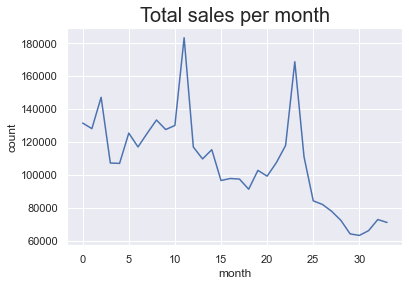

In [140]:
# fig, axes = plt.subplots(nrows=1, ncols=2)
plt.title('Total sales per month',fontsize=20)
# names = ['total sales per month', 'group_b']
plt.plot(item_cnt_month.sum(1))
plt.xlabel("month")
# x_values=list(range(35))
plt.ylabel("count")
plt.show()
# plt.subplot()
# plt.plot(item_cnt_month.sum(1))
# plt.subplot(122)
# axes = ax.flatten()

月销量总体逐渐走低，销量逐渐低迷

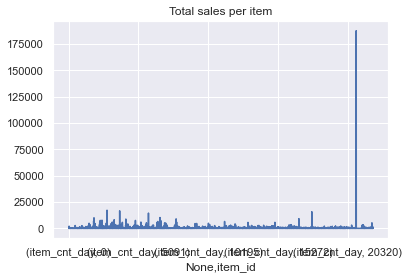

In [141]:
# fig, axes = plt.subplots(1,1, figsize=(20, 8))
# plt.title('total sales per item',fontsize=20)
item_cnt_month.sum(0).plot( title='Total sales per item')  # 每个商品的总销量
# plt.xlabel("item")
# plt.ylabel("count")
# plt.show()
# plt.show()

有一款商品销量远超其他商品

TypeError: 'value' must be an instance of str or bytes, not a tuple

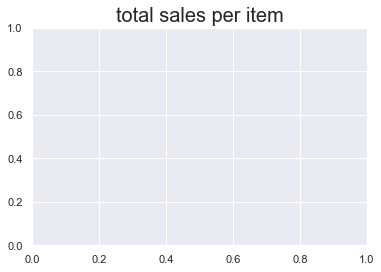

In [87]:
plt.title('total sales per item',fontsize=20)
# names = ['total sales per month', 'group_b']
plt.plot(item_cnt_month.sum(0))
plt.xlabel("item")
plt.ylabel("count")
plt.show()

In [9]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


Text(0.5, 1.0, 'Train')

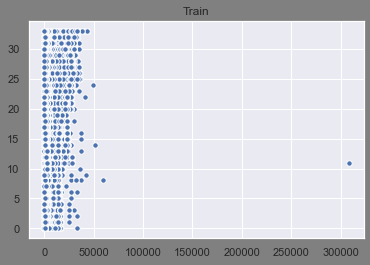

In [45]:
# LSTAT 和MEDV的散点图
plt.figure(facecolor='gray')
plt.scatter(train['item_price'], train['date_block_num'], s=30, edgecolor='white')
plt.title('Train')

In [11]:
test = pd.read_csv('test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
